In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd

# Data Checking

In [2]:
# Read the iris.csv as a data frame
# Your file path might be different
iris = pd.read_csv('./iris.csv')

First 5 lines
   sepalLength  sepalWidth  petalLength  petalWidth      species
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
Randomly select 10 lines
     sepalLength  sepalWidth  petalLength  petalWidth          species
47           4.6         3.2          1.4         0.2      Iris-setosa
3            4.6         3.1          1.5         0.2      Iris-setosa
31           5.4         3.4          1.5         0.4      Iris-setosa
25           5.0         3.0          1.6         0.2      Iris-setosa
15           5.7         4.4          1.5         0.4      Iris-setosa
118          7.7         2.6          6.9         2.3   Iris-virginica
89           5.5         2.5          4.0         1.3  Iris-versicolor
6  

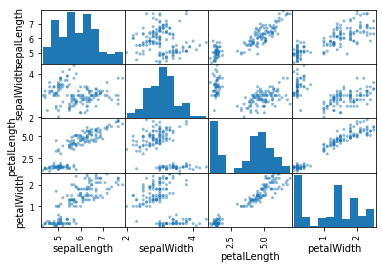

In [3]:
print("First 5 lines")
print(iris.head(5))
print("Randomly select 10 lines")
# Use random_state for reproducibility
# Pay attention to the index selected
print(iris.sample(30, random_state=3))
print("Shape")
print(iris.shape)
print("Info")
print(iris.info())
print("Description")
# Use include='all' to show all columns
print(iris.describe(include='all'))
# Check missing values
iris.isna().sum()
# Save as another csv if applicable
# Your file path might be different
iris.to_csv('./iris_cleaned.csv')
# Mean value by species
iris.groupby('species').mean()
# Max and min value by species
print('Max values')
print(iris.groupby('species').max())
print('*'*80)
print('Min values')
print(iris.groupby('species').min())
# Scatter matrix
pd.plotting.scatter_matrix(iris)
# Save the plot
plt.savefig('iris_scatter_matrix.png')

# Data Loading

In [4]:
from sklearn import datasets

In [5]:
iris = datasets.load_iris()

In [6]:
iris_data = iris.data
iris_label = iris.target
iris_featureName = iris.feature_names
iris_className = iris.target_names

# Data Exploration

In [7]:
print("Iris data shape:", iris_data.shape)
print("***")
print("Iris data type:",type(iris_data))
print("***")
print("Iris features:",iris_featureName)
print("***")
print("Iris data:",iris_data[:3, :])
print("***")
print("Iris label shape:", iris_label.shape)
print("***")
print("Iris class names:",iris_className)
print("***")
print("Iris labels:",iris_label[:3])

Iris data shape: (150, 4)
***
Iris data type: <class 'numpy.ndarray'>
***
Iris features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
***
Iris data: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
***
Iris label shape: (150,)
***
Iris class names: ['setosa' 'versicolor' 'virginica']
***
Iris labels: [0 0 0]


# Data Transformation

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [9]:
# Z-score
scaler_z = StandardScaler()
iris_z = scaler_z.fit(iris_data).transform(iris_data)
# Original mean for four features
iris_data.mean(axis=0)
# Mean for four features after scaling
iris_z.mean(axis=0)
# Examine the standard deviation
iris_z.std(axis=0)
# Min-max scaling
scaler_mm = MinMaxScaler()
iris_mm = scaler_mm.fit(iris_data).transform(iris_data)
# Original min for four features
iris_data.min(axis=0)
# Min for four features after scaling
iris_mm.min(axis=0)
# Examine the maximum
iris_mm.max(axis=0)

array([1., 1., 1., 1.])

In [10]:
# Visualisation
from matplotlib import pyplot as plt

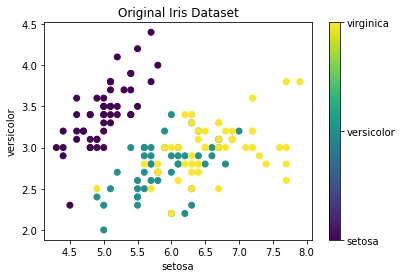

In [11]:
plt.figure()
plt.scatter(iris_data[:, 0], iris_data[:, 1], c=iris_label)
plt.colorbar(ticks=[0, 1, 2],
             format=plt.FuncFormatter(lambda i, *args: iris_className[int(i)]))
plt.xlabel(iris_className[0])
plt.ylabel(iris_className[1])
plt.title("Original Iris Dataset")
plt.show()

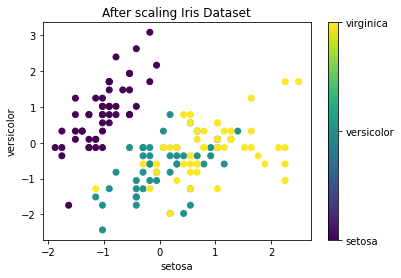

In [12]:
plt.figure()
plt.scatter(iris_z[:, 0], iris_z[:, 1], c=iris_label)
plt.colorbar(ticks=[0, 1, 2],
             format=plt.FuncFormatter(lambda i, *args: iris_className[int(i)]))
plt.xlabel(iris_className[0])
plt.ylabel(iris_className[1])
plt.title("After scaling Iris Dataset")
plt.show()

# Data Modelling
## Supervised Learning

In [13]:
# Step 1: Import libraries
import sklearn
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#  Step 2: Create a 2D NumPy array X and a 1D NumPy array y to constitute a 
#  labelled data set with six 2D data points (denoted by X) and their 
#  corresponding labels (denoted by y):
import numpy as np
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]])
y = np.array([0, 0, 1, 1, 1, 1])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Step 3: Apply holdout to partition the data set (obtained in Step 2) into 
#  a training set and a test set, with 2/3 for training and 1/3 for testing, 
#  and display the partition result.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, 
                                                        random_state=0)

In [17]:
# Training data
print("Training features: \n%s\n\nTraining labels: \n%s" % (X_train, y_train))

Training features: 
[[ 3  4]
 [ 7  8]
 [ 1  2]
 [ 9 10]]

Training labels: 
[0 1 0 1]


In [18]:
# Test data
print("Test features: \n%s\n\nTest labels: \n%s" % (X_test, y_test))

Test features: 
[[11 12]
 [ 5  6]]

Test labels: 
[1 1]


In [19]:
#  Step 4: Apply 2-fold cross-validation to partition the data set (obtained 
#  in Step 2), and display the partition results.
from sklearn.model_selection import KFold
kfCV = KFold(n_splits=2, random_state=0, shuffle=True)
split = kfCV.split(X)
for train_index, test_index in split:
  print("[Fold]", 'train index:', train_index, 'test index:', test_index)

[Fold] train index: [0 3 4] test index: [1 2 5]
[Fold] train index: [1 2 5] test index: [0 3 4]


In [20]:
# You can then use the indeces to get the training and test data
# E.g. to get the training data using the index [3, 4, 5]
X_train_fold_1 = X[[3, 4, 5]]
y_train_fold_1 = y[[3, 4, 5]]
print("Training features: \n%s\n\nTraining labels: \n%s" % (X_train_fold_1, 
                                                            y_train_fold_1))

Training features: 
[[ 7  8]
 [ 9 10]
 [11 12]]

Training labels: 
[1 1 1]


In [21]:
#  Step 5: Apply stratified 2-fold cross-validation to partition the data set 
#  (obtained in Step 2) and display the partition results.
from sklearn.model_selection import StratifiedKFold
skfCV = StratifiedKFold(n_splits=2)
for train_index, test_index in skfCV.split(X, y):
    print('[Fold]:', 'train index:', train_index, 'test index:', test_index)

[Fold]: train index: [1 4 5] test index: [0 2 3]
[Fold]: train index: [0 2 3] test index: [1 4 5]


In [22]:
#  Step 6: Apply leave-one-out cross-validation to partition the data set 
#  (obtained in Step 2) and display the partition results.
from sklearn.model_selection import LeaveOneOut
looCV = LeaveOneOut()
for train_index, test_index in looCV.split(X):
    print('[Fold]:', 'train index:', train_index, 'test index:', test_index)

[Fold]: train index: [1 2 3 4 5] test index: [0]
[Fold]: train index: [0 2 3 4 5] test index: [1]
[Fold]: train index: [0 1 3 4 5] test index: [2]
[Fold]: train index: [0 1 2 4 5] test index: [3]
[Fold]: train index: [0 1 2 3 5] test index: [4]
[Fold]: train index: [0 1 2 3 4] test index: [5]


In [23]:
# Step 1: Load the Boston house data set via the dataset loading utility in sklearn:
from sklearn import datasets
boston = datasets.load_boston()
X = boston.data
y = boston.target

In [24]:
# Step 2: Split the data into a training and a testing set, 
# with 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                        random_state=0)

In [25]:
# Check the dimensions
X_train.shape
y_train.shape

(404,)

In [26]:
# Step 3: Train the multiple linear regression model on the training set.
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_trained = lr.fit(X_train, y_train)
y_pred = lr_trained.predict(X_test)

In [27]:
# Step 4: Evaluate the performance of the trained model on the test set in 
# terms of the Mean Absolute Error (MAE).
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(mae)

3.842909220444498


In [28]:
# Since most data in sklearn are np arrays
# You can easily calculate this by your own using the numpy methods
# This is how you check your result
np.mean(np.abs(y_test - y_pred))

3.842909220444498

In [29]:
# Load the Iris data set via the dataset loading utility in sklearn:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [30]:
# Check shape and confirm they have the same row number
print(X.shape, y.shape)

(150, 4) (150,)


In [31]:
# Step 2: Split the data into a training and a testing set, 
# with 70% for training and 30% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                        random_state=0)

In [32]:
# Check shapes and confirm the ration 150 * 0.7 = 105
print(X_train.shape, y_train.shape)

(105, 4) (105,)


In [33]:
# Check shapes and confirm the ration 150 * 0.3 = 45
print(X_test.shape, y_test.shape)

(45, 4) (45,)


In [34]:
# Step 3: Train the KNN model with K = 3 on the training set.
# Lecture slide page 45
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
# Step 4: Evaluate the performance of the trained model on the test set by 
# computing (and displaying) the confusion matrix and the accuracy.
y_pred = knn.predict(X_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


In [36]:
# Confusion matrix
# The metrics are in the sklearn.metrics submodule
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [37]:
# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9777777777777777


In [38]:
# You can calculate this manually
# Which is what I prefer to do
sum(y_pred==y_test)/len(y_pred)

0.9777777777777777

In [39]:
# Step 5: Set K to 10, 20 and 40, respectively, and repeat the training and 
# evaluating steps as did in Steps 3 and 4.
kValues = [10, 20, 40]
for eachK in kValues:
    # Training
    eachModel = KNeighborsClassifier(n_neighbors=eachK)
    eachModel.fit(X_train, y_train)
    # Testing
    print('-'*20)
    print('k =', eachK)
    eachPred = eachModel.predict(X_test)
    print('Confusion matrix: ')
    print(confusion_matrix(y_test, eachPred))
    print('Accuracy: %.2f' % accuracy_score(y_test, eachPred))
    print('-'*20)

--------------------
k = 10
Confusion matrix: 
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Accuracy: 0.98
--------------------
--------------------
k = 20
Confusion matrix: 
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Accuracy: 0.98
--------------------
--------------------
k = 40
Confusion matrix: 
[[16  0  0]
 [ 0 15  3]
 [ 0  2  9]]
Accuracy: 0.89
--------------------


In [40]:
# Step 6: Compare the results obtained in Steps 4 and 5.

We can see the result is the same for k being 3, 10 and 20. But the model performance drops for k being 40. This could be due to when more neighbours are included, the nearby influence is averaged out, casuing a more smooth but mediocre prediction.